In [ ]:
import pandas as pd
import os
import glob

# Path to your folder with .txt files
data_folder = r"C:\Users\Aditya Joshi\OneDrive\Desktop\gas_conc"  # Replace with your actual path

# Get all .txt files in the folder
txt_files = glob.glob(os.path.join(data_folder, "*.txt"))

# List to store each DataFrame
dataframes = []

# Loop through each .txt file and read it
for file in txt_files:
    # Try reading as comma-separated, then fallback to tab-separated if needed
    try:
        df = pd.read_csv(file)  # default assumes comma separator
    except:
        df = pd.read_csv(file, sep='\t')  # try tab separator
    
    # Add a column for mixture type (filename without extension)
    mixture_type = os.path.basename(file).replace(".txt", "")
    df['mixture_type'] = mixture_type
    
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save to a CSV file
combined_df.to_csv("combined_sensor_data.csv", index=False)

print(f"Combined {len(txt_files)} files. Final shape: {combined_df.shape}")


In [2]:
import pandas as pd

In [ ]:
pd.read_csv('combined_sensor_data.csv')

In [ ]:
import pandas as pd

# Load each file
voltages = pd.read_csv("voltages_train.txt", delim_whitespace=True, header=None)
concentrations = pd.read_csv("concentrations_train.txt", delim_whitespace=True, header=None)
labels = pd.read_csv("training_labels.txt", delim_whitespace=True, header=None)

# Combine them side by side
combined = pd.concat([voltages, concentrations, labels], axis=1)

# Optional: Add column names
voltage_cols = [f'V{i+1}' for i in range(voltages.shape[1])]
concentration_cols = [f'Gas{i+1}' for i in range(concentrations.shape[1])]
combined.columns = voltage_cols + concentration_cols + ['Mixture_Label']

# Save to CSV
combined.to_csv("full_combined_dataset.csv", index=False)

print(f"Combined shape: {combined.shape}")


In [ ]:
pd.read_csv("full_combined_dataset.csv")

In [ ]:
import pandas as pd

# Load the comma-separated files correctly
voltages = pd.read_csv("voltages_train.txt", sep=",", header=None)
concentrations = pd.read_csv("concentrations_train.txt", sep=",", header=None)
labels = pd.read_csv("training_labels.txt", sep=",", header=None)

# Combine them side-by-side
combined = pd.concat([voltages, concentrations, labels], axis=1)

# Add optional column names
voltage_cols = [f'V{i+1}' for i in range(voltages.shape[1])]
concentration_cols = [f'Gas{i+1}' for i in range(concentrations.shape[1])]
combined.columns = voltage_cols + concentration_cols + ['Mixture_Label']

# Save to CSV
combined.to_csv("full_combined_dataset.csv", index=False)

print(f"Combined shape: {combined.shape}")


In [ ]:
pd.read_csv("full_combined_dataset.csv")

In [ ]:
import pandas as pd

# Step 1: Load the final combined dataset
df = pd.read_csv("full_combined_dataset.csv")

# Step 2: Clean column names
df.columns = df.columns.str.strip().str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Step 3: Convert all values to numeric (if possible)
df = df.apply(pd.to_numeric, errors='coerce')

# Step 4: Handle missing values (optional)
# Option A: Drop rows with any missing values
# df.dropna(inplace=True)

# Option B: Fill missing values with 0 (or another value)
df.fillna(0, inplace=True)

# Step 5: Save the cleaned dataset
df.to_csv("cleaned_combined_dataset.csv", index=False)

print("✅ Cleaned file saved as 'cleaned_combined_dataset.csv'")
print(f"📊 Final shape: {df.shape}")


In [9]:
data=pd.read_csv("cleaned_combined_dataset.csv")

In [10]:
data.head()

,V1,V2,V3,V4,Gas1,Gas2,Gas3,Gas4,Mixture_Label
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
1,-0.005886,-0.006094,-0.010269,0.000077,0.0,0.0,0.0,0.0,1.0
2,-0.005854,-0.006106,-0.010264,0.000117,0.0,0.0,0.0,0.0,1.0
3,-0.005863,-0.006103,-0.010250,0.000067,0.0,0.0,0.0,0.0,1.0
4,-0.005872,-0.006087,-0.010242,0.000103,0.0,0.0,0.0,0.0,1.0


In [11]:
print(data.iloc[350])

V1                -0.001956
V2                -0.014265
V3                -0.004659
V4                 0.012081
Gas1             158.895100
Gas2               0.000000
Gas3               0.000000
Gas4               0.000000
Mixture_Label      2.000000
Name: 350, dtype: float64


In [12]:
data = data.rename(columns={
    'V1': 'Cr450 (V)',
    'V2': 'Au475 (V)',
    'V3': 'Cr470 (V)',
    'V4': 'H545 (V)',
    'Gas1': 'NO (ppm)',
    'Gas2': 'C3H8 (ppm)',
    'Gas3': 'NO2 (ppm)',
    'Gas4': 'NH3 (ppm)'
    # 'Mixture_Label' stays unchanged
})

In [13]:
data.head()

,Cr450 (V),Au475 (V),Cr470 (V),H545 (V),NO (ppm),C3H8 (ppm),NO2 (ppm),NH3 (ppm),Mixture_Label
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
1,-0.005886,-0.006094,-0.010269,0.000077,0.0,0.0,0.0,0.0,1.0
2,-0.005854,-0.006106,-0.010264,0.000117,0.0,0.0,0.0,0.0,1.0
3,-0.005863,-0.006103,-0.010250,0.000067,0.0,0.0,0.0,0.0,1.0
4,-0.005872,-0.006087,-0.010242,0.000103,0.0,0.0,0.0,0.0,1.0


In [14]:
data.isnull().sum()

Cr450 (V)        0
Au475 (V)        0
Cr470 (V)        0
H545 (V)         0
NO (ppm)         0
C3H8 (ppm)       0
NO2 (ppm)        0
NH3 (ppm)        0
Mixture_Label    0
dtype: int64

knowing our data and performing eda


In [15]:
print(data.shape)
print(data.columns)
print(data.dtypes)
print(data.describe())
print(data['Mixture_Label'].value_counts())


(101714, 9)
Index(['Cr450 (V)', 'Au475 (V)', 'Cr470 (V)', 'H545 (V)', 'NO (ppm)',
       'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)', 'Mixture_Label'],
      dtype='object')
Cr450 (V)        float64
Au475 (V)        float64
Cr470 (V)        float64
H545 (V)         float64
NO (ppm)         float64
C3H8 (ppm)       float64
NO2 (ppm)        float64
NH3 (ppm)        float64
Mixture_Label    float64
dtype: object
           Cr450 (V)      Au475 (V)      Cr470 (V)       H545 (V)  \
count  101714.000000  101714.000000  101714.000000  101714.000000   
mean        0.036475       0.003163       0.038537       0.083236   
std         0.031798       0.116943       0.030932       0.070863   
min        -0.071718      -0.163214      -0.076824      -0.447198   
25%         0.014245      -0.124749       0.019115       0.039605   
50%         0.037716       0.007724       0.041196       0.074779   
75%         0.059221       0.127365       0.059636       0.146381   
max         0.112914       0.186824     

In [16]:
print(data['Mixture_Label'].value_counts())

Mixture_Label
12.0    36111
10.0    21024
7.0     19168
11.0    15872
9.0      2720
6.0      2112
4.0      2096
3.0       768
8.0       768
5.0       640
1.0       274
2.0       160
0.0         1
Name: count, dtype: int64


In [17]:
print("Null values:\n", data.isnull().sum())
print("Duplicate rows:", data.duplicated().sum())


Null values:
 Cr450 (V)        0
Au475 (V)        0
Cr470 (V)        0
H545 (V)         0
NO (ppm)         0
C3H8 (ppm)       0
NO2 (ppm)        0
NH3 (ppm)        0
Mixture_Label    0
dtype: int64
Duplicate rows: 14


there are 14 duplicate rows in our data removing thous

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(101700, 9)

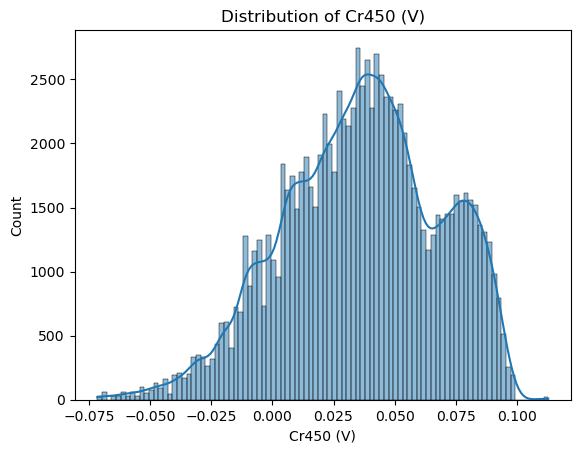

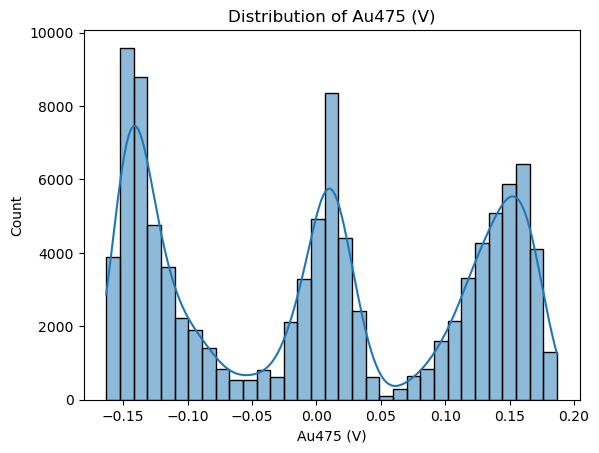

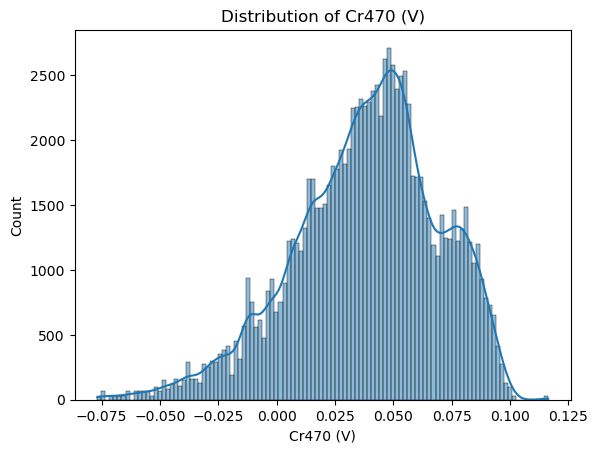

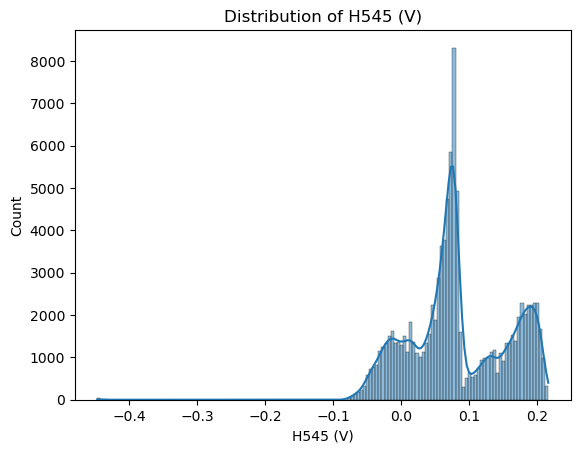

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sensor_cols = ['Cr450 (V)', 'Au475 (V)', 'Cr470 (V)', 'H545 (V)']

for col in sensor_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


<Figure size 500x500 with 0 Axes>

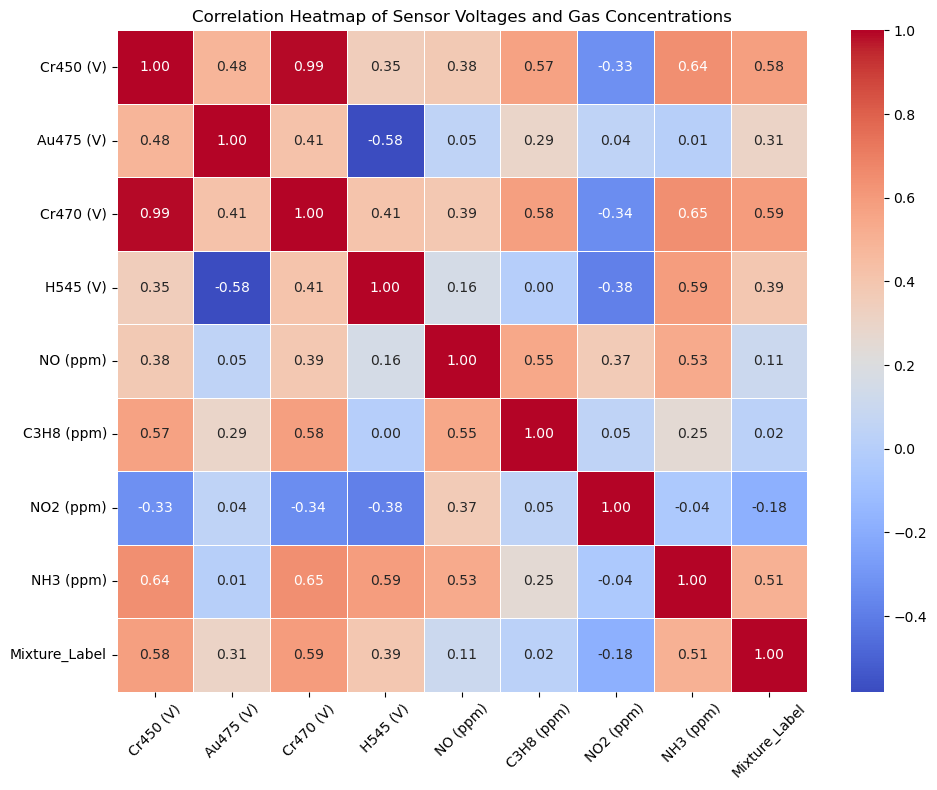

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(5, 5))

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Sensor Voltages and Gas Concentrations")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



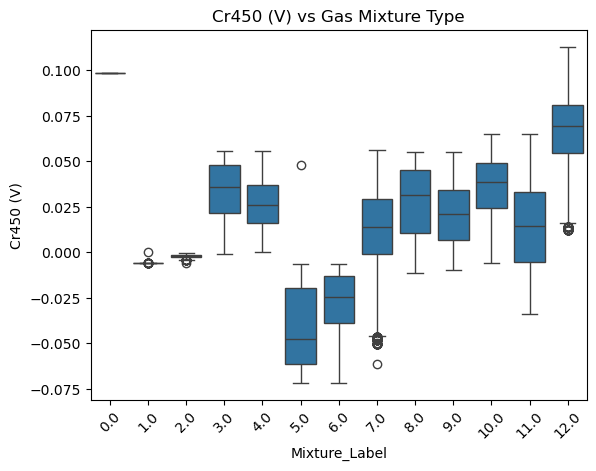

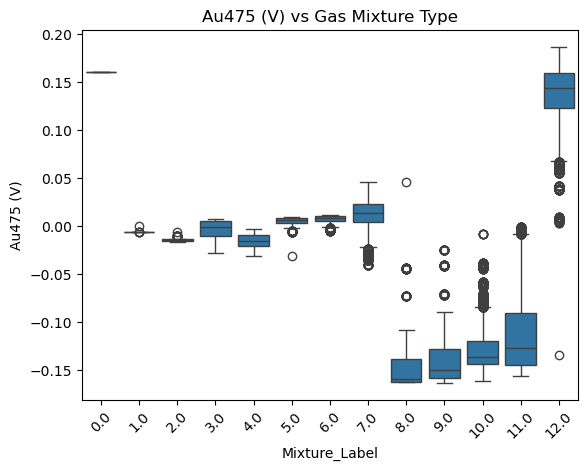

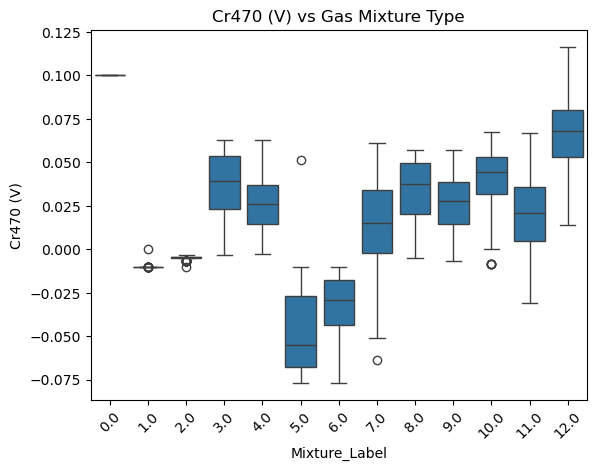

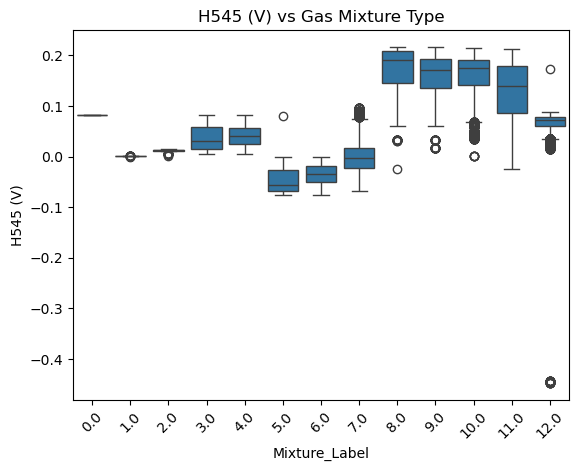

In [22]:
for col in sensor_cols:
    sns.boxplot(x='Mixture_Label', y=col, data=data)
    plt.title(f"{col} vs Gas Mixture Type")
    plt.xticks(rotation=45)
    plt.show()


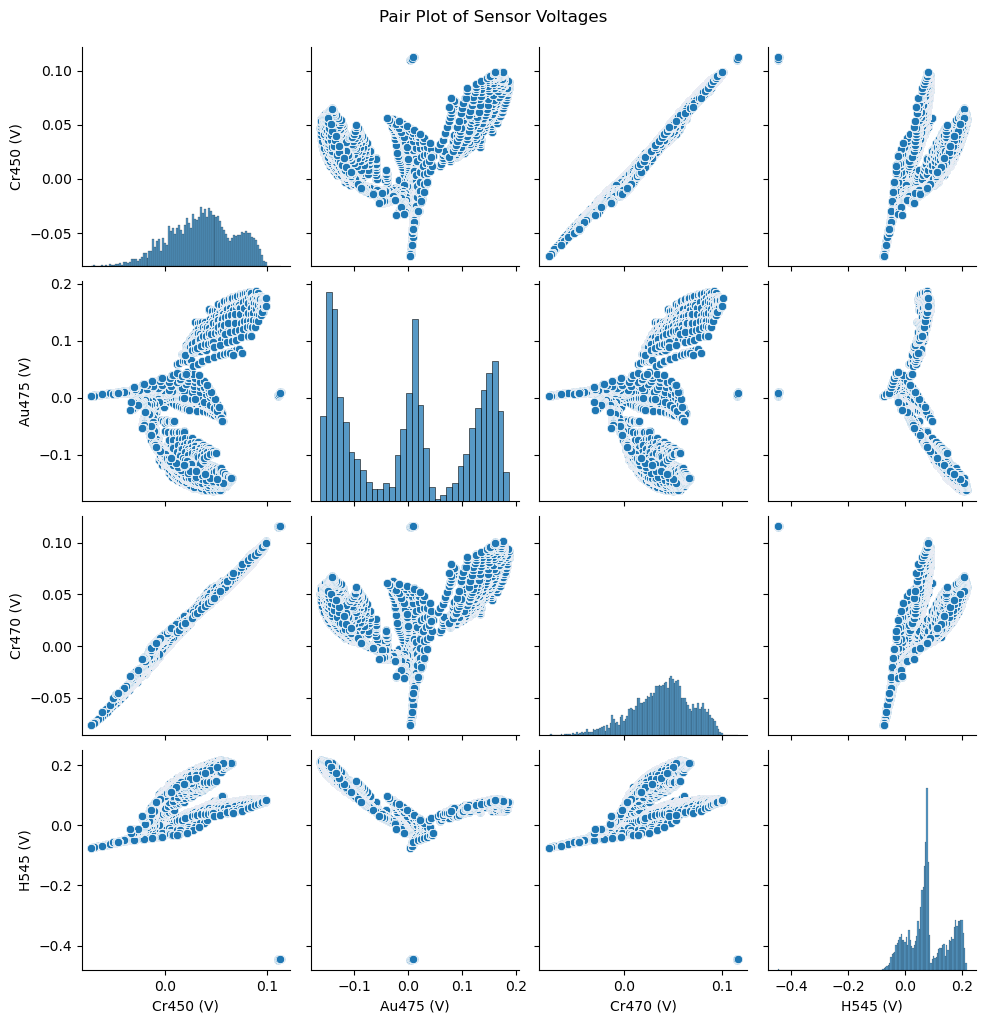

In [23]:
sns.pairplot(data[sensor_cols])
plt.suptitle("Pair Plot of Sensor Voltages", y=1.02)
plt.show()


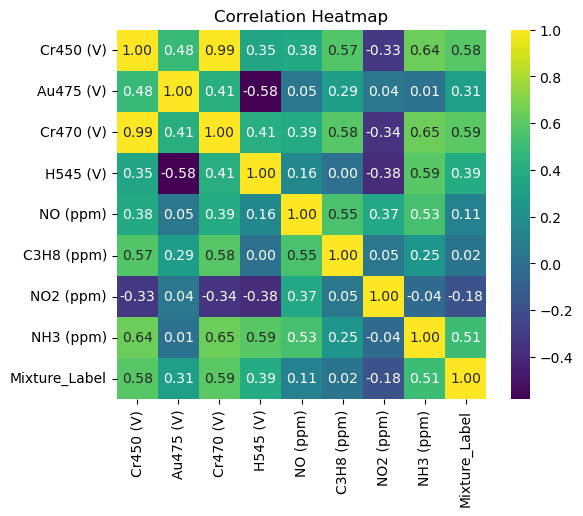

In [24]:
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [26]:
scaled_data

array([[-1.1470316 , -0.02686485, -1.24587992, ..., -0.71549541,
        -0.97428371, -3.89925897],
       [-1.33217461, -0.07897883, -1.57794104, ..., -0.71549541,
        -0.97428371, -3.89925897],
       [-1.33116806, -0.07908145, -1.57777936, ..., -0.71549541,
        -0.97428371, -3.89925897],
       ...,
       [ 1.95796711,  1.3539505 ,  1.99023656, ...,  0.50436981,
         3.10572481,  0.90349469],
       [ 1.95928821,  1.35158169,  1.99162702, ...,  0.50710813,
         3.11379735,  0.90349469],
       [ 1.95928821,  1.35158169,  1.99162702, ...,  0.50710813,
         3.11379735, -4.33587294]])

In [27]:
cols = ['Cr450 (V)', 'Au475 (V)', 'Cr470 (V)', 'H545 (V)',
        'NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

In [28]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Columns to scale
cols = ['Cr450 (V)', 'Au475 (V)', 'Cr470 (V)', 'H545 (V)',
        'NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

# Scale and convert to DataFrame
scaler = StandardScaler()
scaled = scaler.fit_transform(data[cols])
scaled_df = pd.DataFrame(scaled, columns=cols)

# Add label column
scaled_df['Mixture_Label'] = data['Mixture_Label']

# Save or use
scaled_df.to_csv("scaled_data.csv", index=False)


In [29]:
scaled_df.head()

,Cr450 (V),Au475 (V),Cr470 (V),H545 (V),NO (ppm),C3H8 (ppm),NO2 (ppm),NH3 (ppm),Mixture_Label
0,-1.147032,-0.026865,-1.245880,-1.174536,-1.748368,-1.016155,-0.715495,-0.974284,1.0
1,-1.332175,-0.078979,-1.577941,-1.173450,-1.748368,-1.016155,-0.715495,-0.974284,1.0
2,-1.331168,-0.079081,-1.577779,-1.172886,-1.748368,-1.016155,-0.715495,-0.974284,1.0
3,-1.331451,-0.079056,-1.577327,-1.173591,-1.748368,-1.016155,-0.715495,-0.974284,1.0
4,-1.331734,-0.078919,-1.577068,-1.173083,-1.748368,-1.016155,-0.715495,-0.974284,1.0


In [38]:
print(y.unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.  0.]


In [35]:
import numpy as np

y.replace('nan',np.nan , inplace=True)

In [36]:
y.fillna(0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Features and labels
sensor_cols = ['Cr450 (V)', 'Au475 (V)', 'Cr470 (V)', 'H545 (V)']

X = scaled_df[sensor_cols]  # Sensor data
y = scaled_df['Mixture_Label']  # Target: mixture type



In [40]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ SVM Classification Accuracy:", accuracy)


✅ SVM Classification Accuracy: 0.9486725663716814


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report




rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("✅ Random Forest Accuracy:", accuracy)


✅ Random Forest Accuracy: 0.9995083579154376


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Already trained model and predictions ---
# y_test = true labels
# y_pred = predicted labels

# ✅ 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")




✅ Accuracy: 99.95 %


In [ ]:
# ✅ 3. Confusion Matrix (raw)
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix:\n", cm)


🧮 Confusion Matrix:
 [[   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0   47    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1   26    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  177    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1  422    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  123    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  381    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3889    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  138    0    0    1    0]
 [   0    0    0    0    0    0    0    0    0  528    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 4267    2    0]
 [   0    0    0    0    0    0    0    0    0    0    1 3186    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0 7146]]


In [ ]:
# ✅ 2. Classification Report (Precision, Recall, F1)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


📊 Classification Report:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.98      1.00      0.99        47
         2.0       1.00      0.96      0.98        27
         3.0       0.99      1.00      1.00       177
         4.0       1.00      1.00      1.00       423
         5.0       1.00      1.00      1.00       123
         6.0       1.00      1.00      1.00       381
         7.0       1.00      1.00      1.00      3889
         8.0       1.00      0.99      1.00       139
         9.0       1.00      1.00      1.00       528
        10.0       1.00      1.00      1.00      4269
        11.0       1.00      1.00      1.00      3187
        12.0       1.00      1.00      1.00      7149

    accuracy                           1.00     20340
   macro avg       0.92      0.92      0.92     20340
weighted avg       1.00      1.00      1.00     20340



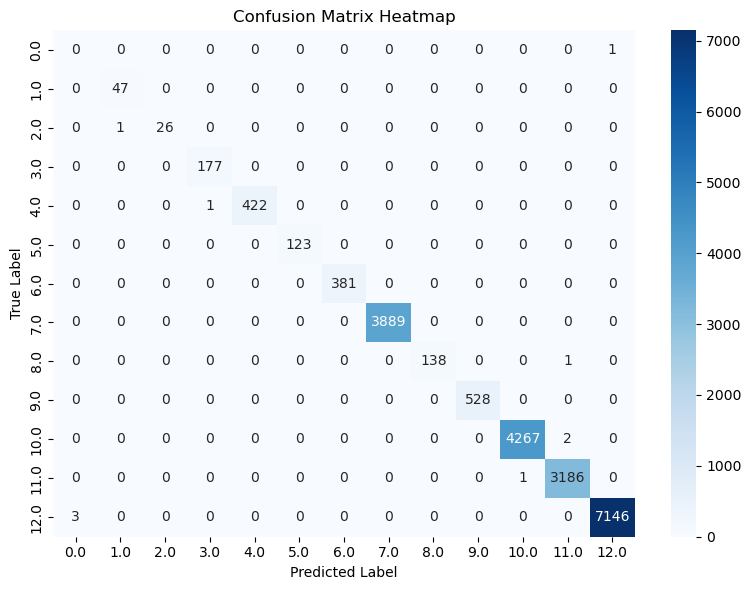

In [ ]:
# ✅ 4. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [ ]:
scaled_df.head()

,Cr450 (V),Au475 (V),Cr470 (V),H545 (V),NO (ppm),C3H8 (ppm),NO2 (ppm),NH3 (ppm),Mixture_Label
0,-1.147032,-0.026865,-1.245880,-1.174536,-1.748368,-1.016155,-0.715495,-0.974284,1.0
1,-1.332175,-0.078979,-1.577941,-1.173450,-1.748368,-1.016155,-0.715495,-0.974284,1.0
2,-1.331168,-0.079081,-1.577779,-1.172886,-1.748368,-1.016155,-0.715495,-0.974284,1.0
3,-1.331451,-0.079056,-1.577327,-1.173591,-1.748368,-1.016155,-0.715495,-0.974284,1.0
4,-1.331734,-0.078919,-1.577068,-1.173083,-1.748368,-1.016155,-0.715495,-0.974284,1.0


In [ ]:
sensor_cols = ['Cr450 (V)', 'Au475 (V)', 'Cr470 (V)', 'H545 (V)']
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

In [ ]:
X_reg_train = X_train.copy()
X_reg_train['Mixture_Label'] = y_train.values  # Use actual label for training

X_reg_test = X_test.copy()
X_reg_test['Mixture_Label'] = y_pred  # Use predicted label for test

In [ ]:
X_reg_train.head()

,Cr450 (V),Au475 (V),Cr470 (V),H545 (V),Mixture_Label
37490,0.077724,-1.344133,0.147457,1.546979,10.0
84903,1.396184,1.357936,1.309946,-0.065326,12.0
29313,-1.051252,-0.841516,-0.874078,0.210626,10.0
44210,0.195774,-1.201867,0.321491,1.365118,10.0
86479,1.079308,1.491248,1.092355,-0.362317,12.0


In [ ]:
Y_reg_train = scaled_df.loc[X_train.index, gas_targets]
Y_reg_test  = scaled_df.loc[X_test.index, gas_targets]

In [ ]:
Y_reg_train.head()

,NO (ppm),C3H8 (ppm),NO2 (ppm),NH3 (ppm)
37490,-0.173628,-0.629884,-0.715495,0.454378
84903,0.155215,0.614241,-0.383988,0.746366
29313,-1.434525,-0.860603,-0.715495,-0.809909
44210,0.769522,0.528848,-0.715495,0.331920
86479,0.467759,-0.472638,-0.330120,1.033141


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create and train the multi-output regression model
regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
regressor.fit(X_reg_train, Y_reg_train)

# Predict on test data
Y_pred = regressor.predict(X_reg_test)

# Evaluate with RMSE for each gas
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

print("\n📊 RMSE for each gas concentration:")
for i, gas in enumerate(gas_targets):
    rmse = mean_squared_error(Y_reg_test[gas], Y_pred[:, i], squared=False)
    print(f"{gas}: {rmse:.4f}")



📊 RMSE for each gas concentration:
NO (ppm): 0.0597
C3H8 (ppm): 0.0128
NO2 (ppm): 0.0307
NH3 (ppm): 0.0185


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Define model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_reg_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4))  # Output layer: one neuron per gas

# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Step 3: Train the model
model.fit(X_reg_train, Y_reg_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

# Step 4: Predict
Y_pred = model.predict(X_reg_test)

# Step 5: Evaluate
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']
print("\n📊 ANN RMSE per gas:")
for i, gas in enumerate(gas_targets):
    rmse = mean_squared_error(Y_reg_test[gas], Y_pred[:, i], squared=False)
    print(f"{gas}: {rmse:.4f}")


Epoch 1/100


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - loss: 0.6135 - val_loss: 0.3256
Epoch 2/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.3135 - val_loss: 0.2636
Epoch 3/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - loss: 0.2640 - val_loss: 0.2272
Epoch 4/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 0.2342 - val_loss: 0.2030
Epoch 5/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 0.2070 - val_loss: 0.1771
Epoch 6/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 0.1841 - val_loss: 0.1726
Epoch 7/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - loss: 0.1695 - val_loss: 0.1551
Epoch 8/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - loss: 0.1551 - val_loss: 0.1508
Epoch 9/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 0.1464 - val_loss: 0.1514
Epoch 10/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - loss: 0.1413 - val_loss: 0.1342
Epoch 11/100
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss: 0.1312 - val_loss: 0.1351
Epoch 12/

c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# === Step 1: Scale inputs and outputs ===
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_reg_train)
X_test_scaled = scaler_X.transform(X_reg_test)

Y_train_scaled = scaler_Y.fit_transform(Y_reg_train)
Y_test_scaled = scaler_Y.transform(Y_reg_test)

# === Step 2: Build improved ANN ===
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(4)  # 4 gas concentration outputs
])

# === Step 3: Compile the model ===
model.compile(optimizer='adam', loss='mse')

# === Step 4: Early stopping to prevent overfitting ===
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# === Step 5: Train the model ===
history = model.fit(
    X_train_scaled, Y_train_scaled,
    epochs=300,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# === Step 6: Predict and inverse scale ===
Y_pred_scaled = model.predict(X_test_scaled)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)

# === Step 7: Evaluate performance ===
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']
print("\n📊 Improved ANN RMSE per gas:")
for i, gas in enumerate(gas_targets):
    rmse = mean_squared_error(Y_reg_test[gas], Y_pred[:, i], squared=False)
    print(f"{gas}: {rmse:.4f}")


Epoch 1/300


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0373 - val_loss: 0.0156
Epoch 2/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 0.0171 - val_loss: 0.0120
Epoch 3/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 0.0145 - val_loss: 0.0121
Epoch 4/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0133 - val_loss: 0.0096
Epoch 5/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 0.0121 - val_loss: 0.0090
Epoch 6/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0115 - val_loss: 0.0095
Epoch 7/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 0.0113 - val_loss: 0.0088
Epoch 8/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 0.0108 - val_loss: 0.0084
Epoch 9/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 0.0104 - val_loss: 0.0078
Epoch 10/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 0.0103 - val_loss: 0.0105
Epoch 11/300
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 0.0101 - val_loss: 0.0076
Epoch 12/300
11

c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

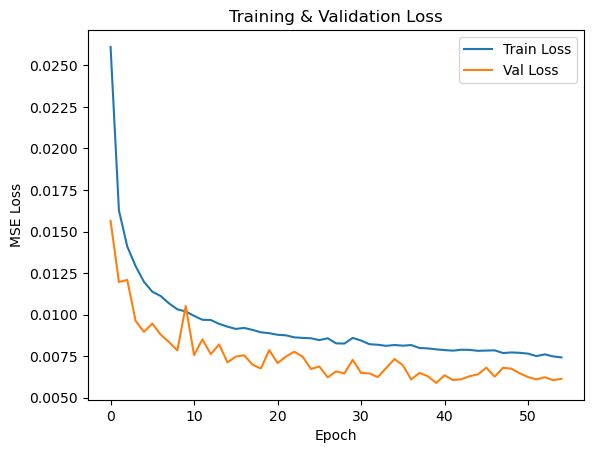

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.legend()
# plt.title('Training & Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('MSE Loss')
# plt.show()


Epoch 1/500


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1272/1272 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1595 - mae: 0.2681 - val_loss: 0.0174 - val_mae: 0.0862
Epoch 2/500
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0236 - mae: 0.1090 - val_loss: 0.0135 - val_mae: 0.0719
Epoch 3/500
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0181 - mae: 0.0925 - val_loss: 0.0144 - val_mae: 0.0744
Epoch 4/500
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0157 - mae: 0.0851 - val_loss: 0.0127 - val_mae: 0.0733
Epoch 5/500
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0141 - mae: 0.0797 - val_loss: 0.0092 - val_mae: 0.0597
Epoch 6/500
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0125 - mae: 0.0744 - val_loss: 0.0442 - val_mae: 0.1361
Epoch 7/500
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0118 - mae: 0.0717 - val_loss: 0.0084 - val_mae: 0.0588
Epoch 8/500
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0108 - mae: 0.0684 - val_loss: 0.0072 - val_mae: 0.0527
Epoch 9/500
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2

c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

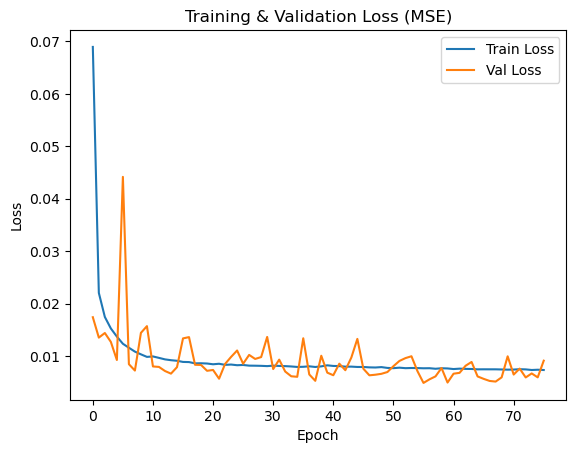

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Scale inputs and outputs ===
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_reg_train)
X_test_scaled = scaler_X.transform(X_reg_test)

Y_train_scaled = scaler_Y.fit_transform(Y_reg_train)
Y_test_scaled = scaler_Y.transform(Y_reg_test)

# === Step 2: Build optimized ANN ===
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train_scaled.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(4)  # 4 output neurons for 4 gases
])

# === Step 3: Compile the model ===
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# === Step 4: Early stopping and training ===
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_scaled, Y_train_scaled,
    validation_data=(X_test_scaled, Y_test_scaled),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# === Step 5: Predict and inverse scale ===
Y_pred_scaled = model.predict(X_test_scaled)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)

# === Step 6: Evaluate with RMSE & R² ===
from sklearn.metrics import mean_squared_error, r2_score
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

print("\n📊 RMSE and R² Score per Gas:")
for i, gas in enumerate(gas_targets):
    rmse = mean_squared_error(Y_reg_test.iloc[:, i], Y_pred[:, i], squared=False)
    r2 = r2_score(Y_reg_test.iloc[:, i], Y_pred[:, i])
    print(f"{gas}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# === Step 7: Plot training loss ===
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # ✅ FIXED
}


# Use RandomizedSearchCV on base RandomForestRegressor
base_rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=param_dist,
    n_iter=20,  # Try 20 combinations
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Wrap it in MultiOutputRegressor
model = MultiOutputRegressor(search)
model.fit(X_reg_train, Y_reg_train)

# Predict
Y_pred = model.predict(X_reg_test)

# Evaluate
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']
print("\n📊 Tuned Random Forest RMSE per gas:")
for i, gas in enumerate(gas_targets):
    rmse = mean_squared_error(Y_reg_test[gas], Y_pred[:, i], squared=False)
    print(f"{gas}: {rmse:.4f}")

# Best parameters used
print("\n🔧 Best parameters for individual estimators:")
for i, estimator in enumerate(model.estimators_):
    print(f"{gas_targets[i]}: {estimator.best_params_}")


NameError: name 'X_reg_train' is not defined

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np

# === Best parameters per gas ===
best_params = {
    'NO (ppm)':   {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40},
    'C3H8 (ppm)': {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40},
    'NO2 (ppm)':  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None,  'max_depth': None},
    'NH3 (ppm)':  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}
}

# === Gas targets
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

# === Train a separate model per gas with best params
final_models = {}
final_rmse = {}

for gas in gas_targets:
    print(f"\n🔧 Training model for {gas}...")
    
    model = RandomForestRegressor(**best_params[gas], random_state=42)
    model.fit(X_reg_train, Y_reg_train[gas])
    
    preds = model.predict(X_reg_test)
    rmse = root_mean_squared_error(Y_reg_test[gas], preds)
    
    final_models[gas] = model
    final_rmse[gas] = rmse

    print(f"📉 RMSE for {gas}: {rmse:.4f}")



🔧 Training model for NO (ppm)...


NameError: name 'X_reg_train' is not defined


📊 Evaluation for NO (ppm)
✅ RMSE: 0.0486
✅ MAE:  0.0115
✅ R²:   0.9976
✅ MAPE: 2.41%


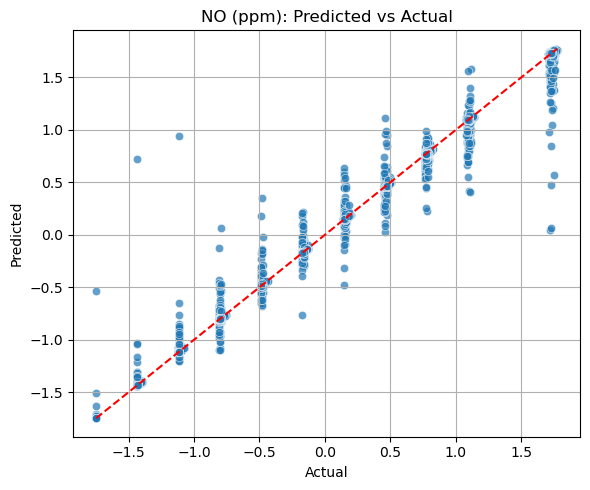

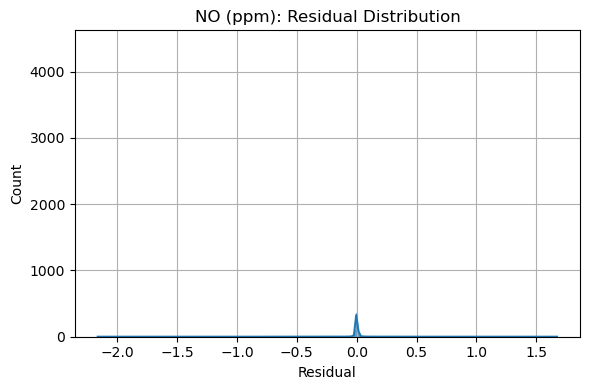

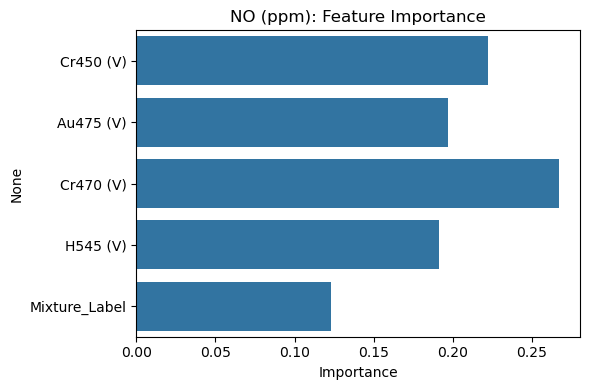


📊 Evaluation for C3H8 (ppm)
✅ RMSE: 0.0101
✅ MAE:  0.0034
✅ R²:   0.9999
✅ MAPE: 0.97%


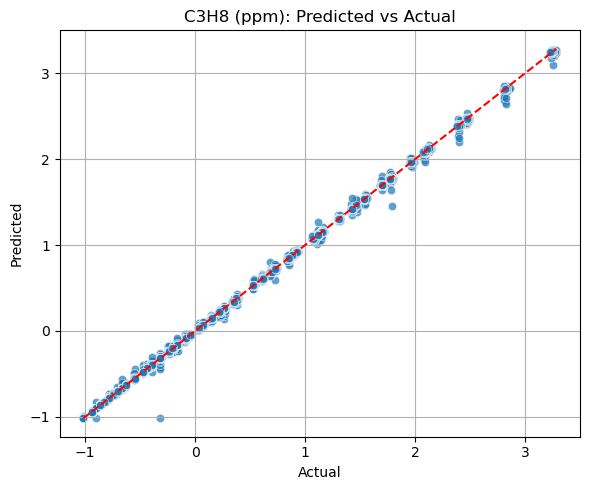

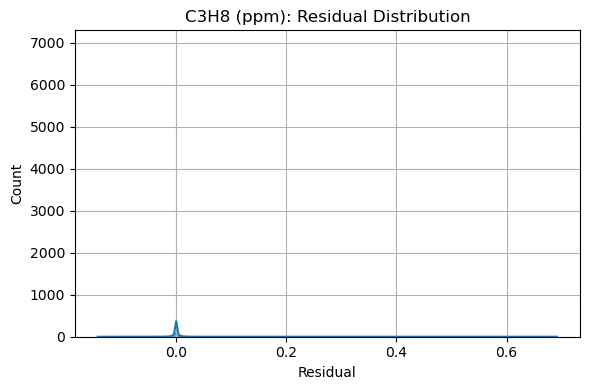

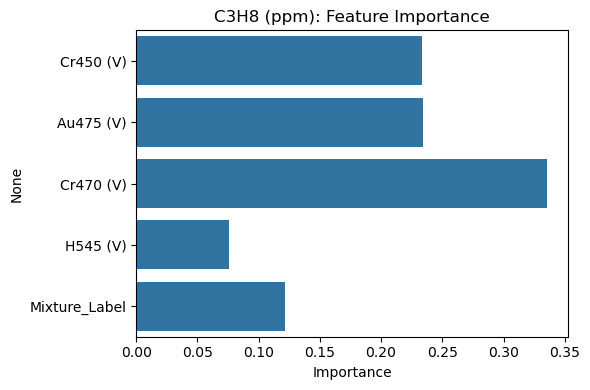


📊 Evaluation for NO2 (ppm)
✅ RMSE: 0.0307
✅ MAE:  0.0033
✅ R²:   0.9991
✅ MAPE: 0.79%


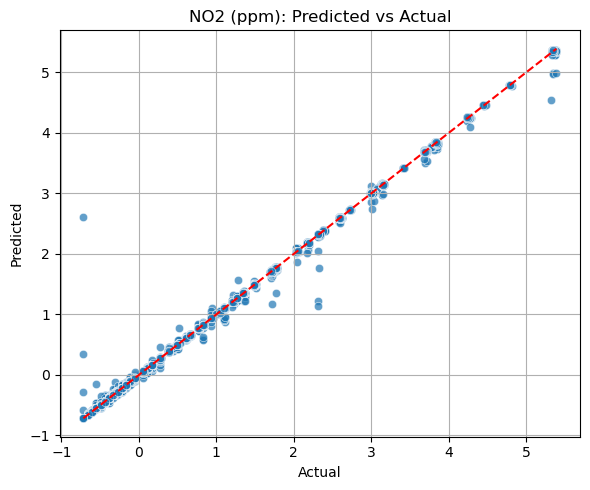

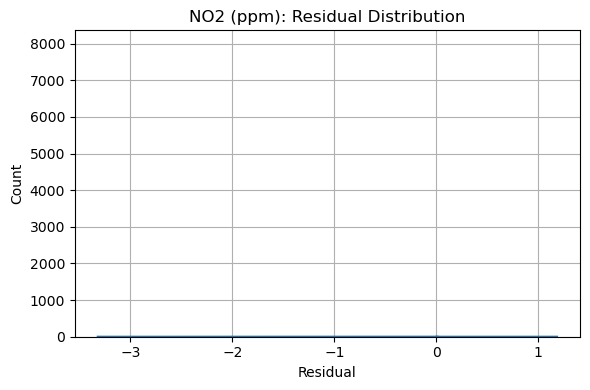

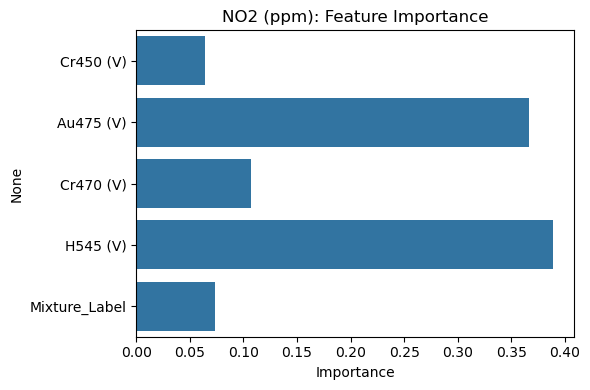


📊 Evaluation for NH3 (ppm)
✅ RMSE: 0.0178
✅ MAE:  0.0034
✅ R²:   0.9997
✅ MAPE: 2.39%


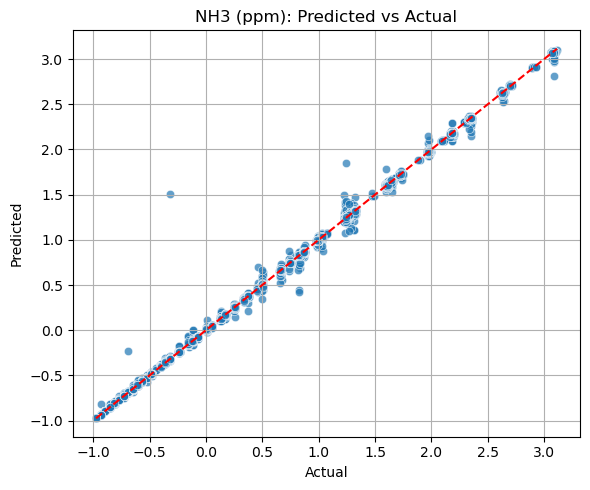

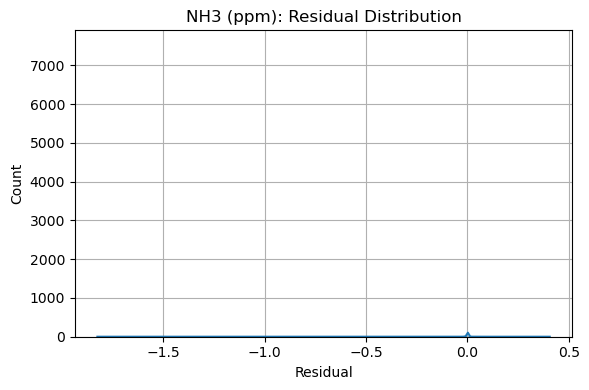

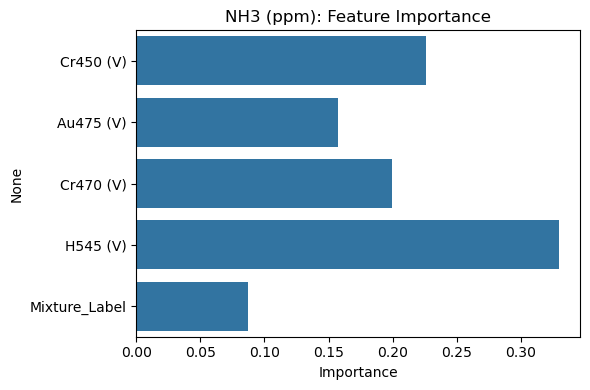

In [ ]:
# from sklearn.metrics import mean_absolute_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# for gas in gas_targets:
#     print(f"\n📊 Evaluation for {gas}")
    
#     model = final_models[gas]
#     y_true = Y_reg_test[gas]
#     y_pred = model.predict(X_reg_test)

#     # --- Metrics ---
#     rmse = root_mean_squared_error(y_true, y_pred)
#     mae = mean_absolute_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#     print(f"✅ RMSE: {rmse:.4f}")
#     print(f"✅ MAE:  {mae:.4f}")
#     print(f"✅ R²:   {r2:.4f}")
#     print(f"✅ MAPE: {mape:.2f}%")

#     # --- Plot: Predicted vs Actual ---
#     plt.figure(figsize=(6, 5))
#     sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
#     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
#     plt.title(f"{gas}: Predicted vs Actual")
#     plt.xlabel("Actual")
#     plt.ylabel("Predicted")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     # --- Plot: Residuals ---
#     residuals = y_true - y_pred
#     plt.figure(figsize=(6, 4))
#     sns.histplot(residuals, kde=True)
#     plt.title(f"{gas}: Residual Distribution")
#     plt.xlabel("Residual")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     # --- Plot: Feature Importance ---
#     importances = model.feature_importances_
#     feature_names = X_reg_train.columns
#     plt.figure(figsize=(6, 4))
#     sns.barplot(x=importances, y=feature_names)
#     plt.title(f"{gas}: Feature Importance")
#     plt.xlabel("Importance")
#     plt.tight_layout()
#     plt.show()



🔎 Polynomial Regression (degree=2) for NO (ppm)
✅ RMSE: 0.6795
✅ R² Score: 0.5388


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


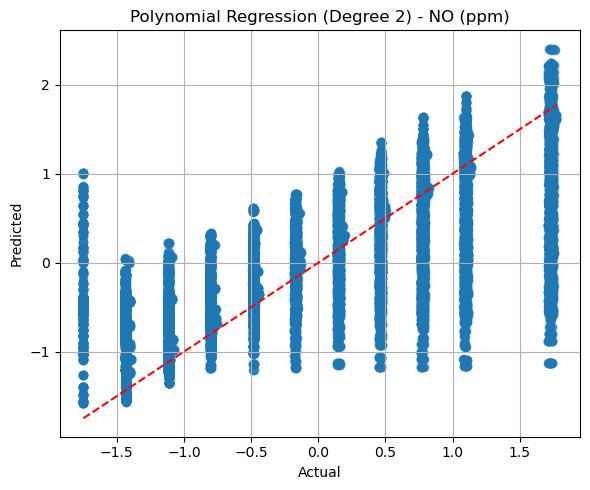

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Define polynomial degree
# degree = 2  # You can try 3, 4 later

# # Build and train pipeline
# poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# poly_model.fit(X_reg_train, Y_reg_train['NO (ppm)'])

# # Predict
# y_pred_no_poly = poly_model.predict(X_reg_test)

# # Evaluate
# rmse = mean_squared_error(Y_reg_test['NO (ppm)'], y_pred_no_poly, squared=False)
# r2 = r2_score(Y_reg_test['NO (ppm)'], y_pred_no_poly)

# print(f"\n🔎 Polynomial Regression (degree={degree}) for NO (ppm)")
# print(f"✅ RMSE: {rmse:.4f}")
# print(f"✅ R² Score: {r2:.4f}")

# # Plot Actual vs Predicted
# plt.figure(figsize=(6, 5))
# plt.scatter(Y_reg_test['NO (ppm)'], y_pred_no_poly, alpha=0.7)
# plt.plot([Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          [Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          '--r')
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("Polynomial Regression (Degree {}) - NO (ppm)".format(degree))
# plt.grid(True)
# plt.tight_layout()
# plt.show()



🔎 Polynomial Regression (Degree 3) for NO (ppm)
✅ RMSE: 0.5104
✅ R² Score: 0.7397


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


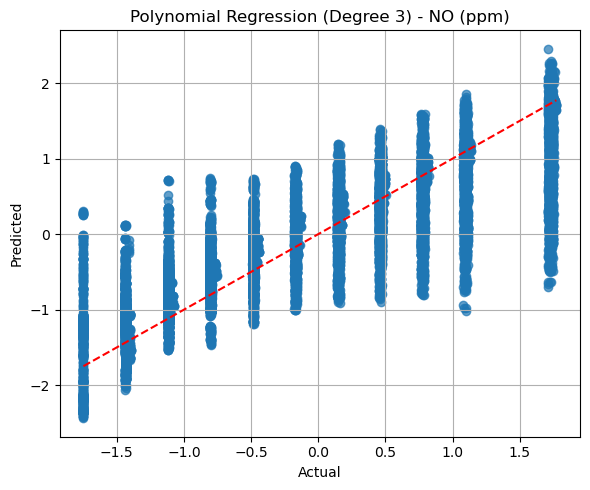


🔎 Polynomial Regression (Degree 4) for NO (ppm)
✅ RMSE: 0.4196
✅ R² Score: 0.8241


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


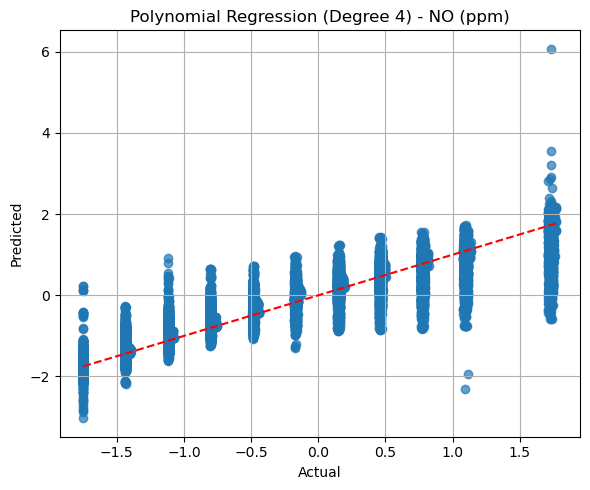

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Try degrees 3 and 4
# for degree in [3, 4]:
#     # Create model pipeline
#     poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#     poly_model.fit(X_reg_train, Y_reg_train['NO (ppm)'])

#     # Predict
#     y_pred = poly_model.predict(X_reg_test)

#     # Evaluate
#     rmse = mean_squared_error(Y_reg_test['NO (ppm)'], y_pred, squared=False)
#     r2 = r2_score(Y_reg_test['NO (ppm)'], y_pred)

#     print(f"\n🔎 Polynomial Regression (Degree {degree}) for NO (ppm)")
#     print(f"✅ RMSE: {rmse:.4f}")
#     print(f"✅ R² Score: {r2:.4f}")

#     # Plot: Actual vs Predicted
#     plt.figure(figsize=(6, 5))
#     plt.scatter(Y_reg_test['NO (ppm)'], y_pred, alpha=0.7)
#     plt.plot([Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#              [Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#              '--r')
#     plt.xlabel("Actual")
#     plt.ylabel("Predicted")
#     plt.title(f"Polynomial Regression (Degree {degree}) - NO (ppm)")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()



🔎 Polynomial Regression (Degree 5) for NO (ppm)
✅ RMSE: 0.3679
✅ R² Score: 0.8648


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


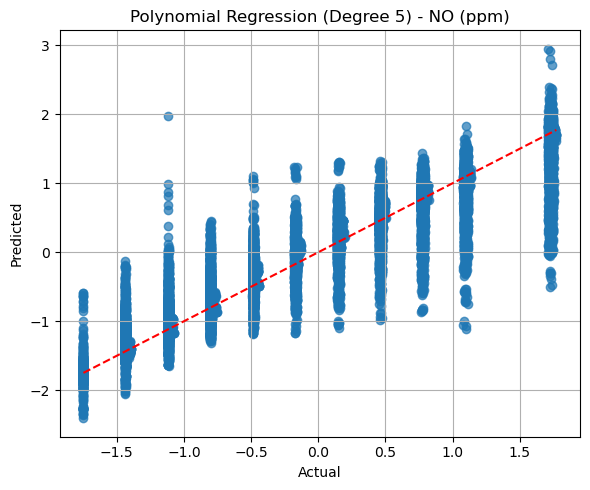

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Degree 5 polynomial regression
# degree = 5

# # Create pipeline
# poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# poly_model.fit(X_reg_train, Y_reg_train['NO (ppm)'])

# # Predict
# y_pred = poly_model.predict(X_reg_test)

# # Evaluate
# rmse = mean_squared_error(Y_reg_test['NO (ppm)'], y_pred, squared=False)
# r2 = r2_score(Y_reg_test['NO (ppm)'], y_pred)

# print(f"\n🔎 Polynomial Regression (Degree {degree}) for NO (ppm)")
# print(f"✅ RMSE: {rmse:.4f}")
# print(f"✅ R² Score: {r2:.4f}")

# # Plot: Actual vs Predicted
# plt.figure(figsize=(6, 5))
# plt.scatter(Y_reg_test['NO (ppm)'], y_pred, alpha=0.7)
# plt.plot([Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          [Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          '--r')
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title(f"Polynomial Regression (Degree {degree}) - NO (ppm)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()



📊 Linear Regression for NO (ppm)
✅ RMSE: 0.8623
✅ R² Score: 0.2571


c:\Users\Aditya Joshi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


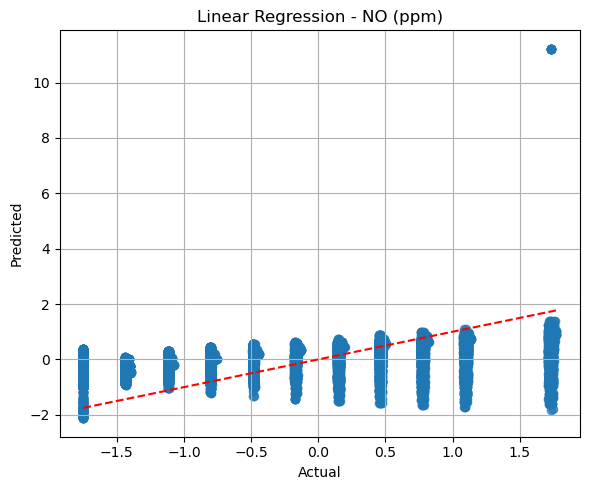

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Train the Linear Regression model
# lr_model = LinearRegression()
# lr_model.fit(X_reg_train, Y_reg_train['NO (ppm)'])

# # Predict
# y_pred_lr = lr_model.predict(X_reg_test)

# # Evaluate
# rmse = mean_squared_error(Y_reg_test['NO (ppm)'], y_pred_lr, squared=False)
# r2 = r2_score(Y_reg_test['NO (ppm)'], y_pred_lr)

# print(f"\n📊 Linear Regression for NO (ppm)")
# print(f"✅ RMSE: {rmse:.4f}")
# print(f"✅ R² Score: {r2:.4f}")

# # Plot: Actual vs Predicted
# plt.figure(figsize=(6, 5))
# plt.scatter(Y_reg_test['NO (ppm)'], y_pred_lr, alpha=0.7)
# plt.plot([Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          [Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          '--r')
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("Linear Regression - NO (ppm)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import root_mean_squared_error, r2_score

# # Define target gases
# gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

# # === 1. Polynomial Regression for NO (ppm)
# poly_model_NO = make_pipeline(
#     PolynomialFeatures(degree=4),
#     LinearRegression()
# )
# poly_model_NO.fit(X_reg_train, Y_reg_train['NO (ppm)'])

# # === 2. Random Forest for other gases
# rf_models = {}
# for gas in gas_targets[1:]:
#     model = RandomForestRegressor(
#         n_estimators=200, min_samples_split=2, min_samples_leaf=1,
#         max_features='log2', max_depth=40, random_state=42
#     )
#     model.fit(X_reg_train, Y_reg_train[gas])
#     rf_models[gas] = model

# # === 3. Make predictions
# Y_pred_combined = {}

# # Predict NO (ppm)
# Y_pred_combined['NO (ppm)'] = poly_model_NO.predict(X_reg_test)

# # Predict other gases
# for gas in gas_targets[1:]:
#     Y_pred_combined[gas] = rf_models[gas].predict(X_reg_test)

# # === 4. Evaluate and print results
# print("\n📊 Hybrid Model Evaluation:")
# for gas in gas_targets:
#     y_true = Y_reg_test[gas]
#     y_pred = Y_pred_combined[gas]
#     rmse = root_mean_squared_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)

#     print(f"\n🔹 {gas}")
#     print(f"✅ RMSE: {rmse:.4f}")
#     print(f"✅ R²:   {r2:.4f}")



📊 Hybrid Model Evaluation:

🔹 NO (ppm)
✅ RMSE: 0.4196
✅ R²:   0.8241

🔹 C3H8 (ppm)
✅ RMSE: 0.0101
✅ R²:   0.9999

🔹 NO2 (ppm)
✅ RMSE: 0.0334
✅ R²:   0.9989

🔹 NH3 (ppm)
✅ RMSE: 0.0178
✅ R²:   0.9997


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import root_mean_squared_error, r2_score

# # Define target gases
# gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

# # === 1. Polynomial Regression for NO (ppm)
# poly_model_NO = make_pipeline(
#     PolynomialFeatures(degree=4),
#     LinearRegression()
# )
# poly_model_NO.fit(X_reg_train, Y_reg_train['NO (ppm)'])

# # === 2. Random Forest for other gases
# rf_models = {}
# for gas in gas_targets[1:]:
#     model = RandomForestRegressor(
#         n_estimators=200, min_samples_split=2, min_samples_leaf=1,
#         max_features='log2', max_depth=40, random_state=42
#     )
#     model.fit(X_reg_train, Y_reg_train[gas])
#     rf_models[gas] = model

# # === 3. Make predictions
# Y_pred_combined = {}

# # Predict NO (ppm)
# Y_pred_combined['NO (ppm)'] = poly_model_NO.predict(X_reg_test)

# # Predict other gases
# for gas in gas_targets[1:]:
#     Y_pred_combined[gas] = rf_models[gas].predict(X_reg_test)

# # === 4. Evaluate and print results
# print("\n📊 Hybrid Model Evaluation:")
# for gas in gas_targets:
#     y_true = Y_reg_test[gas]
#     y_pred = Y_pred_combined[gas]
#     rmse = root_mean_squared_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)

#     print(f"\n🔹 {gas}")
#     print(f"✅ RMSE: {rmse:.4f}")
#     print(f"✅ R²:   {r2:.4f}")



📊 Hybrid Model Evaluation:

🔹 NO (ppm)
✅ RMSE: 0.4196
✅ R²:   0.8241

🔹 C3H8 (ppm)
✅ RMSE: 0.0101
✅ R²:   0.9999

🔹 NO2 (ppm)
✅ RMSE: 0.0334
✅ R²:   0.9989

🔹 NH3 (ppm)
✅ RMSE: 0.0178
✅ R²:   0.9997


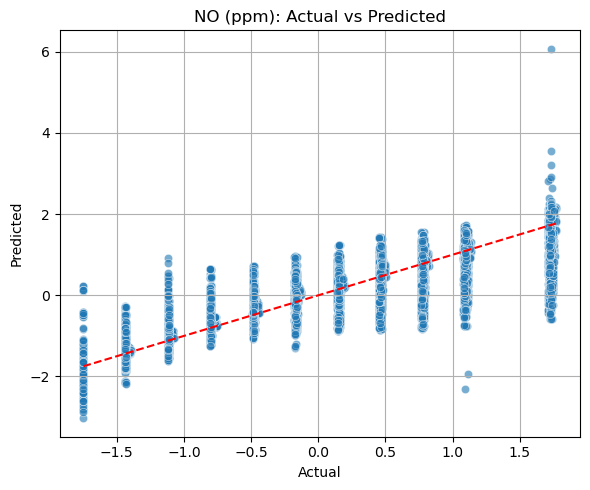

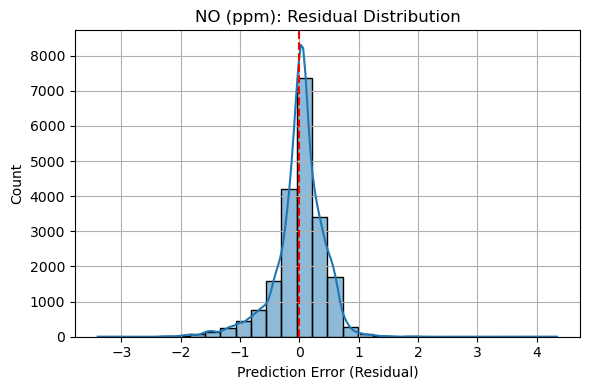

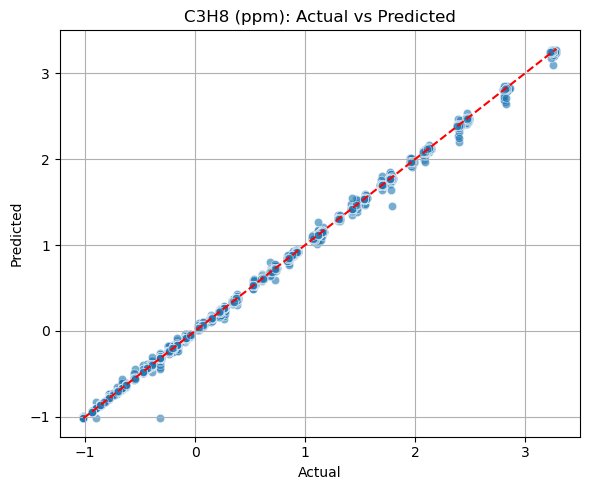

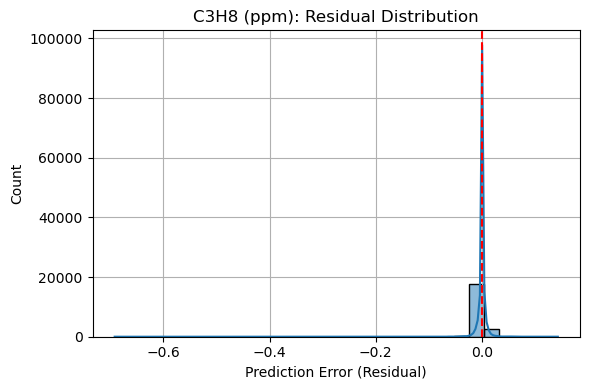

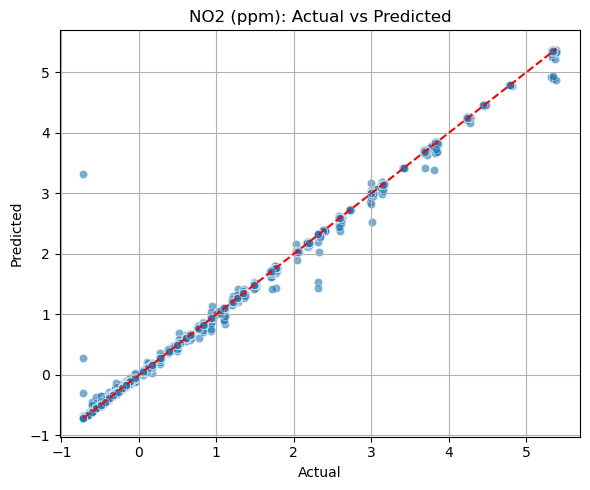

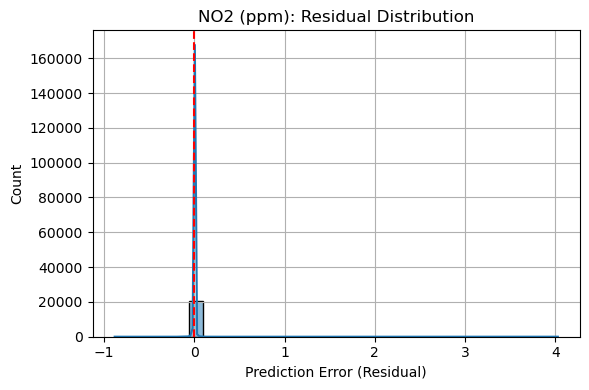

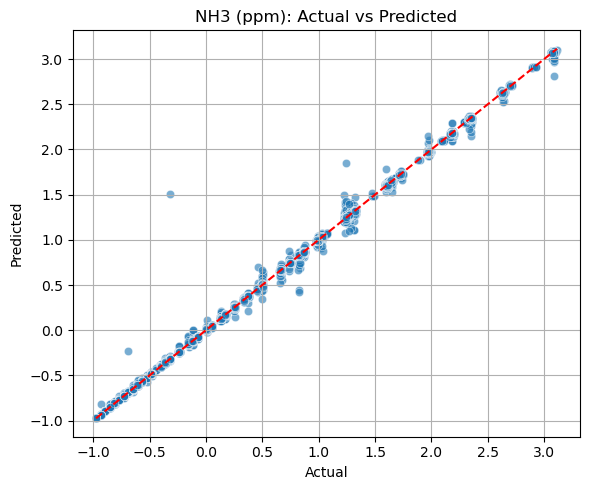

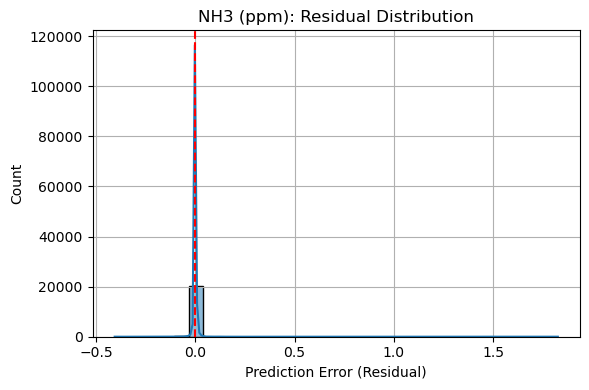

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === Visualization for each gas ===
# for gas in gas_targets:
#     y_true = Y_reg_test[gas]
#     y_pred = Y_pred_combined[gas]

#     # --- 1. Actual vs Predicted ---
#     plt.figure(figsize=(6, 5))
#     sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
#     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
#     plt.title(f"{gas}: Actual vs Predicted")
#     plt.xlabel("Actual")
#     plt.ylabel("Predicted")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     # --- 2. Residual Plot ---
#     residuals = y_pred - y_true
#     plt.figure(figsize=(6, 4))
#     sns.histplot(residuals, kde=True, bins=30)
#     plt.axvline(0, color='red', linestyle='--')
#     plt.title(f"{gas}: Residual Distribution")
#     plt.xlabel("Prediction Error (Residual)")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()



📊 Gradient Boosting for NO (ppm)
✅ RMSE: 0.3969
✅ R² Score: 0.8426


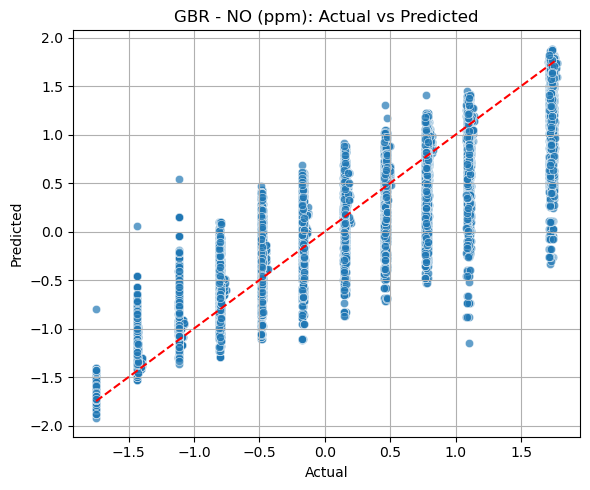

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import root_mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === Train Gradient Boosting model for NO (ppm)
# gbr_model_no = GradientBoostingRegressor(
#     n_estimators=300,
#     learning_rate=0.05,
#     max_depth=5,
#     random_state=42
# )
# gbr_model_no.fit(X_reg_train, Y_reg_train['NO (ppm)'])

# # === Predict
# y_pred_gbr_no = gbr_model_no.predict(X_reg_test)

# # === Evaluate
# rmse_gbr = root_mean_squared_error(Y_reg_test['NO (ppm)'], y_pred_gbr_no)
# r2_gbr = r2_score(Y_reg_test['NO (ppm)'], y_pred_gbr_no)

# print(f"\n📊 Gradient Boosting for NO (ppm)")
# print(f"✅ RMSE: {rmse_gbr:.4f}")
# print(f"✅ R² Score: {r2_gbr:.4f}")

# # === Plot: Actual vs Predicted
# plt.figure(figsize=(6, 5))
# sns.scatterplot(x=Y_reg_test['NO (ppm)'], y=y_pred_gbr_no, alpha=0.7)
# plt.plot([Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          [Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          '--r')
# plt.title("GBR - NO (ppm): Actual vs Predicted")
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import root_mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Enhanced Gradient Boosting Model
# gbr_model_no = GradientBoostingRegressor(
#     n_estimators=1000,        # More trees
#     learning_rate=0.01,       # Smaller learning rate for better convergence
#     max_depth=6,              # Capture deeper interactions
#     min_samples_split=5,
#     min_samples_leaf=3,
#     subsample=0.8,            # Use random sampling to reduce overfitting
#     random_state=42
# )

# # Train model
# gbr_model_no.fit(X_reg_train, Y_reg_train['NO (ppm)'])

# # Predict
# y_pred_gbr = gbr_model_no.predict(X_reg_test)

# # Evaluate
# rmse = root_mean_squared_error(Y_reg_test['NO (ppm)'], y_pred_gbr)
# r2 = r2_score(Y_reg_test['NO (ppm)'], y_pred_gbr)

# print(f"\n📊 Enhanced Gradient Boosting for NO (ppm)")
# print(f"✅ RMSE: {rmse:.4f}")
# print(f"✅ R² Score: {r2:.4f}")

# # Plot Actual vs Predicted
# plt.figure(figsize=(6, 5))
# sns.scatterplot(x=Y_reg_test['NO (ppm)'], y=y_pred_gbr, alpha=0.7)
# plt.plot([Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          [Y_reg_test['NO (ppm)'].min(), Y_reg_test['NO (ppm)'].max()],
#          '--r')
# plt.title("Enhanced GBR - NO (ppm): Actual vs Predicted")
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


KeyboardInterrupt: 


📊 Hybrid Model Evaluation:

🔹 NO (ppm)
✅ RMSE: 0.3743
✅ R²:   0.8600


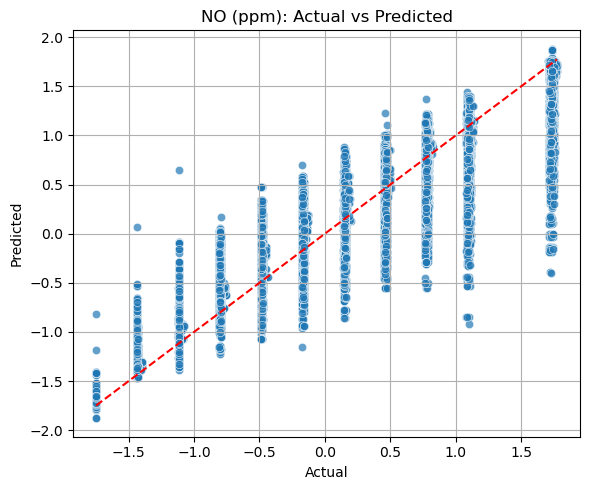

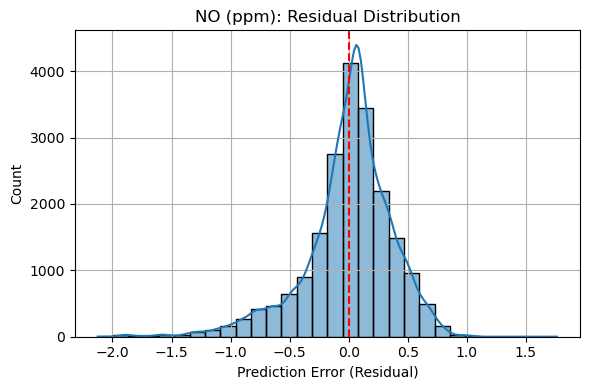


🔹 C3H8 (ppm)
✅ RMSE: 0.0101
✅ R²:   0.9999


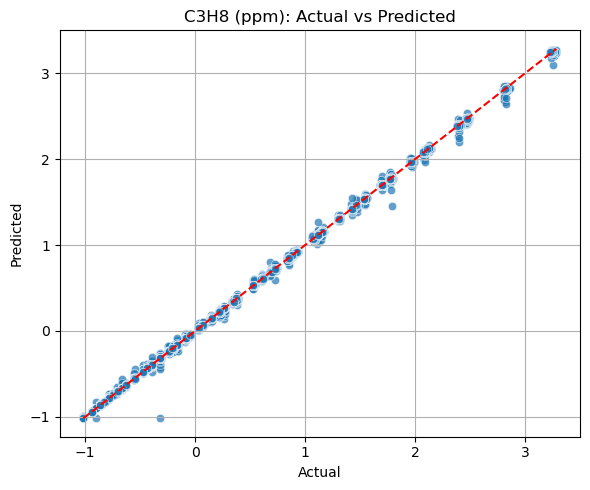

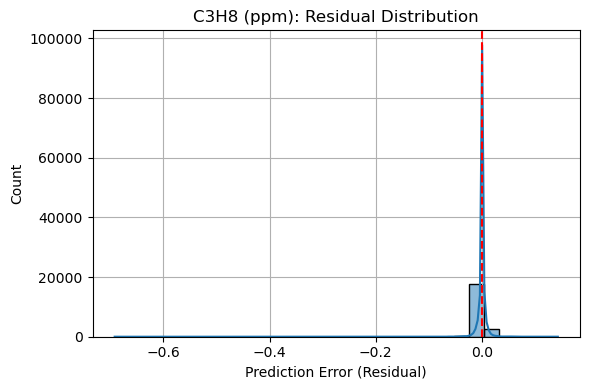


🔹 NO2 (ppm)
✅ RMSE: 0.0307
✅ R²:   0.9991


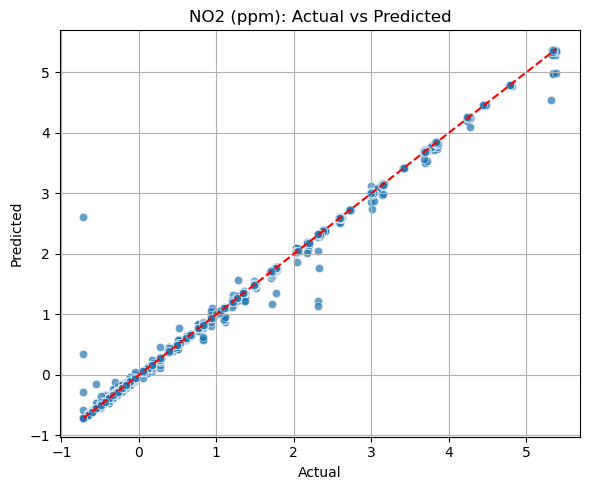

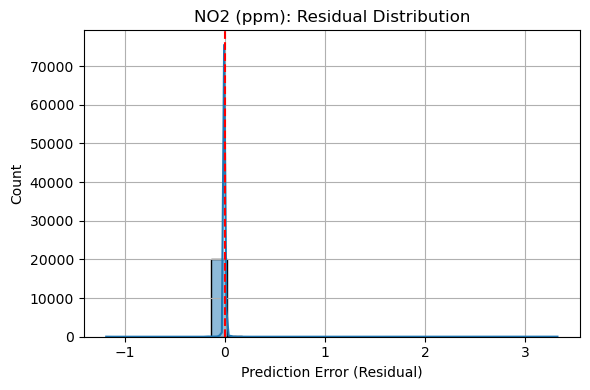


🔹 NH3 (ppm)
✅ RMSE: 0.0178
✅ R²:   0.9997


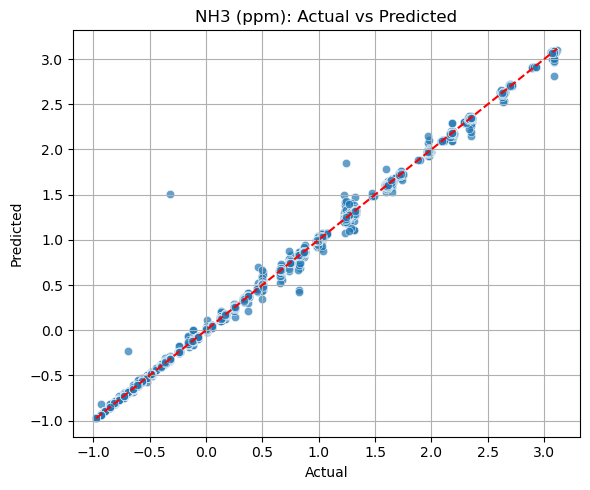

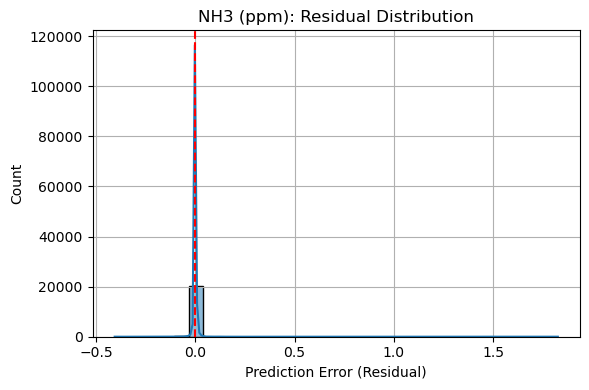

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define target gases
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

# === 1. Enhanced GBR for NO (ppm)
gbr_model_NO = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=3,
    subsample=0.8,
    random_state=42
)
gbr_model_NO.fit(X_reg_train, Y_reg_train['NO (ppm)'])

# === 2. Tuned Random Forest models for other gases
best_params = {
    'C3H8 (ppm)': {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40},
    'NO2 (ppm)':  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None},
    'NH3 (ppm)':  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}
}

rf_models = {}
for gas, params in best_params.items():
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_reg_train, Y_reg_train[gas])
    rf_models[gas] = model

# === 3. Make predictions
Y_pred_combined = {}

# Predict NO (ppm) using enhanced GBR
Y_pred_combined['NO (ppm)'] = gbr_model_NO.predict(X_reg_test)

# Predict other gases using Random Forest
for gas in gas_targets[1:]:
    Y_pred_combined[gas] = rf_models[gas].predict(X_reg_test)

# === 4. Evaluate and visualize
print("\n📊 Hybrid Model Evaluation:")
for gas in gas_targets:
    y_true = Y_reg_test[gas]
    y_pred = Y_pred_combined[gas]
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n🔹 {gas}")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ R²:   {r2:.4f}")

    # Plot: Actual vs Predicted
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
    plt.title(f"{gas}: Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot: Residual Distribution
    residuals = y_pred - y_true
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"{gas}: Residual Distribution")
    plt.xlabel("Prediction Error (Residual)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming your predicted values are in Y_pred_scaled and columns are in this order:
gas_targets = ['NO (ppm)', 'C3H8 (ppm)', 'NO2 (ppm)', 'NH3 (ppm)']

# Refit scaler on original unscaled concentration data
scaler_conc = StandardScaler()
scaler_conc.fit(data[gas_targets])  # Unscaled original concentration columns

# Inverse transform predictions
Y_pred_original = scaler_conc.inverse_transform(pd.DataFrame(Y_pred_combined, columns=gas_targets))

# Convert to DataFrame for readability
Y_pred_original_df = pd.DataFrame(Y_pred_original, columns=gas_targets)

# Optional: Save to CSV
Y_pred_original_df.to_csv("original_concentrations.csv", index=False)

# Show first few rows
print(Y_pred_original_df.head())


     NO (ppm)    C3H8 (ppm)     NO2 (ppm)     NH3 (ppm)
0  104.623148  3.979265e+02  7.963816e+01  7.872814e-12
1  136.892083  1.603937e+02  6.389943e+01  1.198789e+02
2   89.865901  1.783884e+02  4.733309e+01  7.986500e-12
3  176.225924  5.588449e+02  6.373660e+01  1.596874e+02
4  105.536114 -6.252776e-13 -6.309619e-12  1.196714e+02
